<a href="https://colab.research.google.com/github/Maoelan/Possum-EDA-Head_Length_Prediction_Based_on_Skull_Weight/blob/main/Possum_EDA_%26_Head_Length_Prediction_Based_on_Skull_Weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [297]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [299]:
pos = pd.read_csv('/content/drive/MyDrive/dataset/possum.csv')
pos.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [300]:
pos.shape

(104, 14)

In [301]:
pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [302]:
pos.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [303]:
print(pos.isnull().sum())

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64


In [304]:
pos['age'].fillna(method = 'ffill', inplace = True)

In [305]:
pos['footlgth'].fillna(method = 'bfill', inplace = True)

In [306]:
print(pos.isnull().sum())

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64


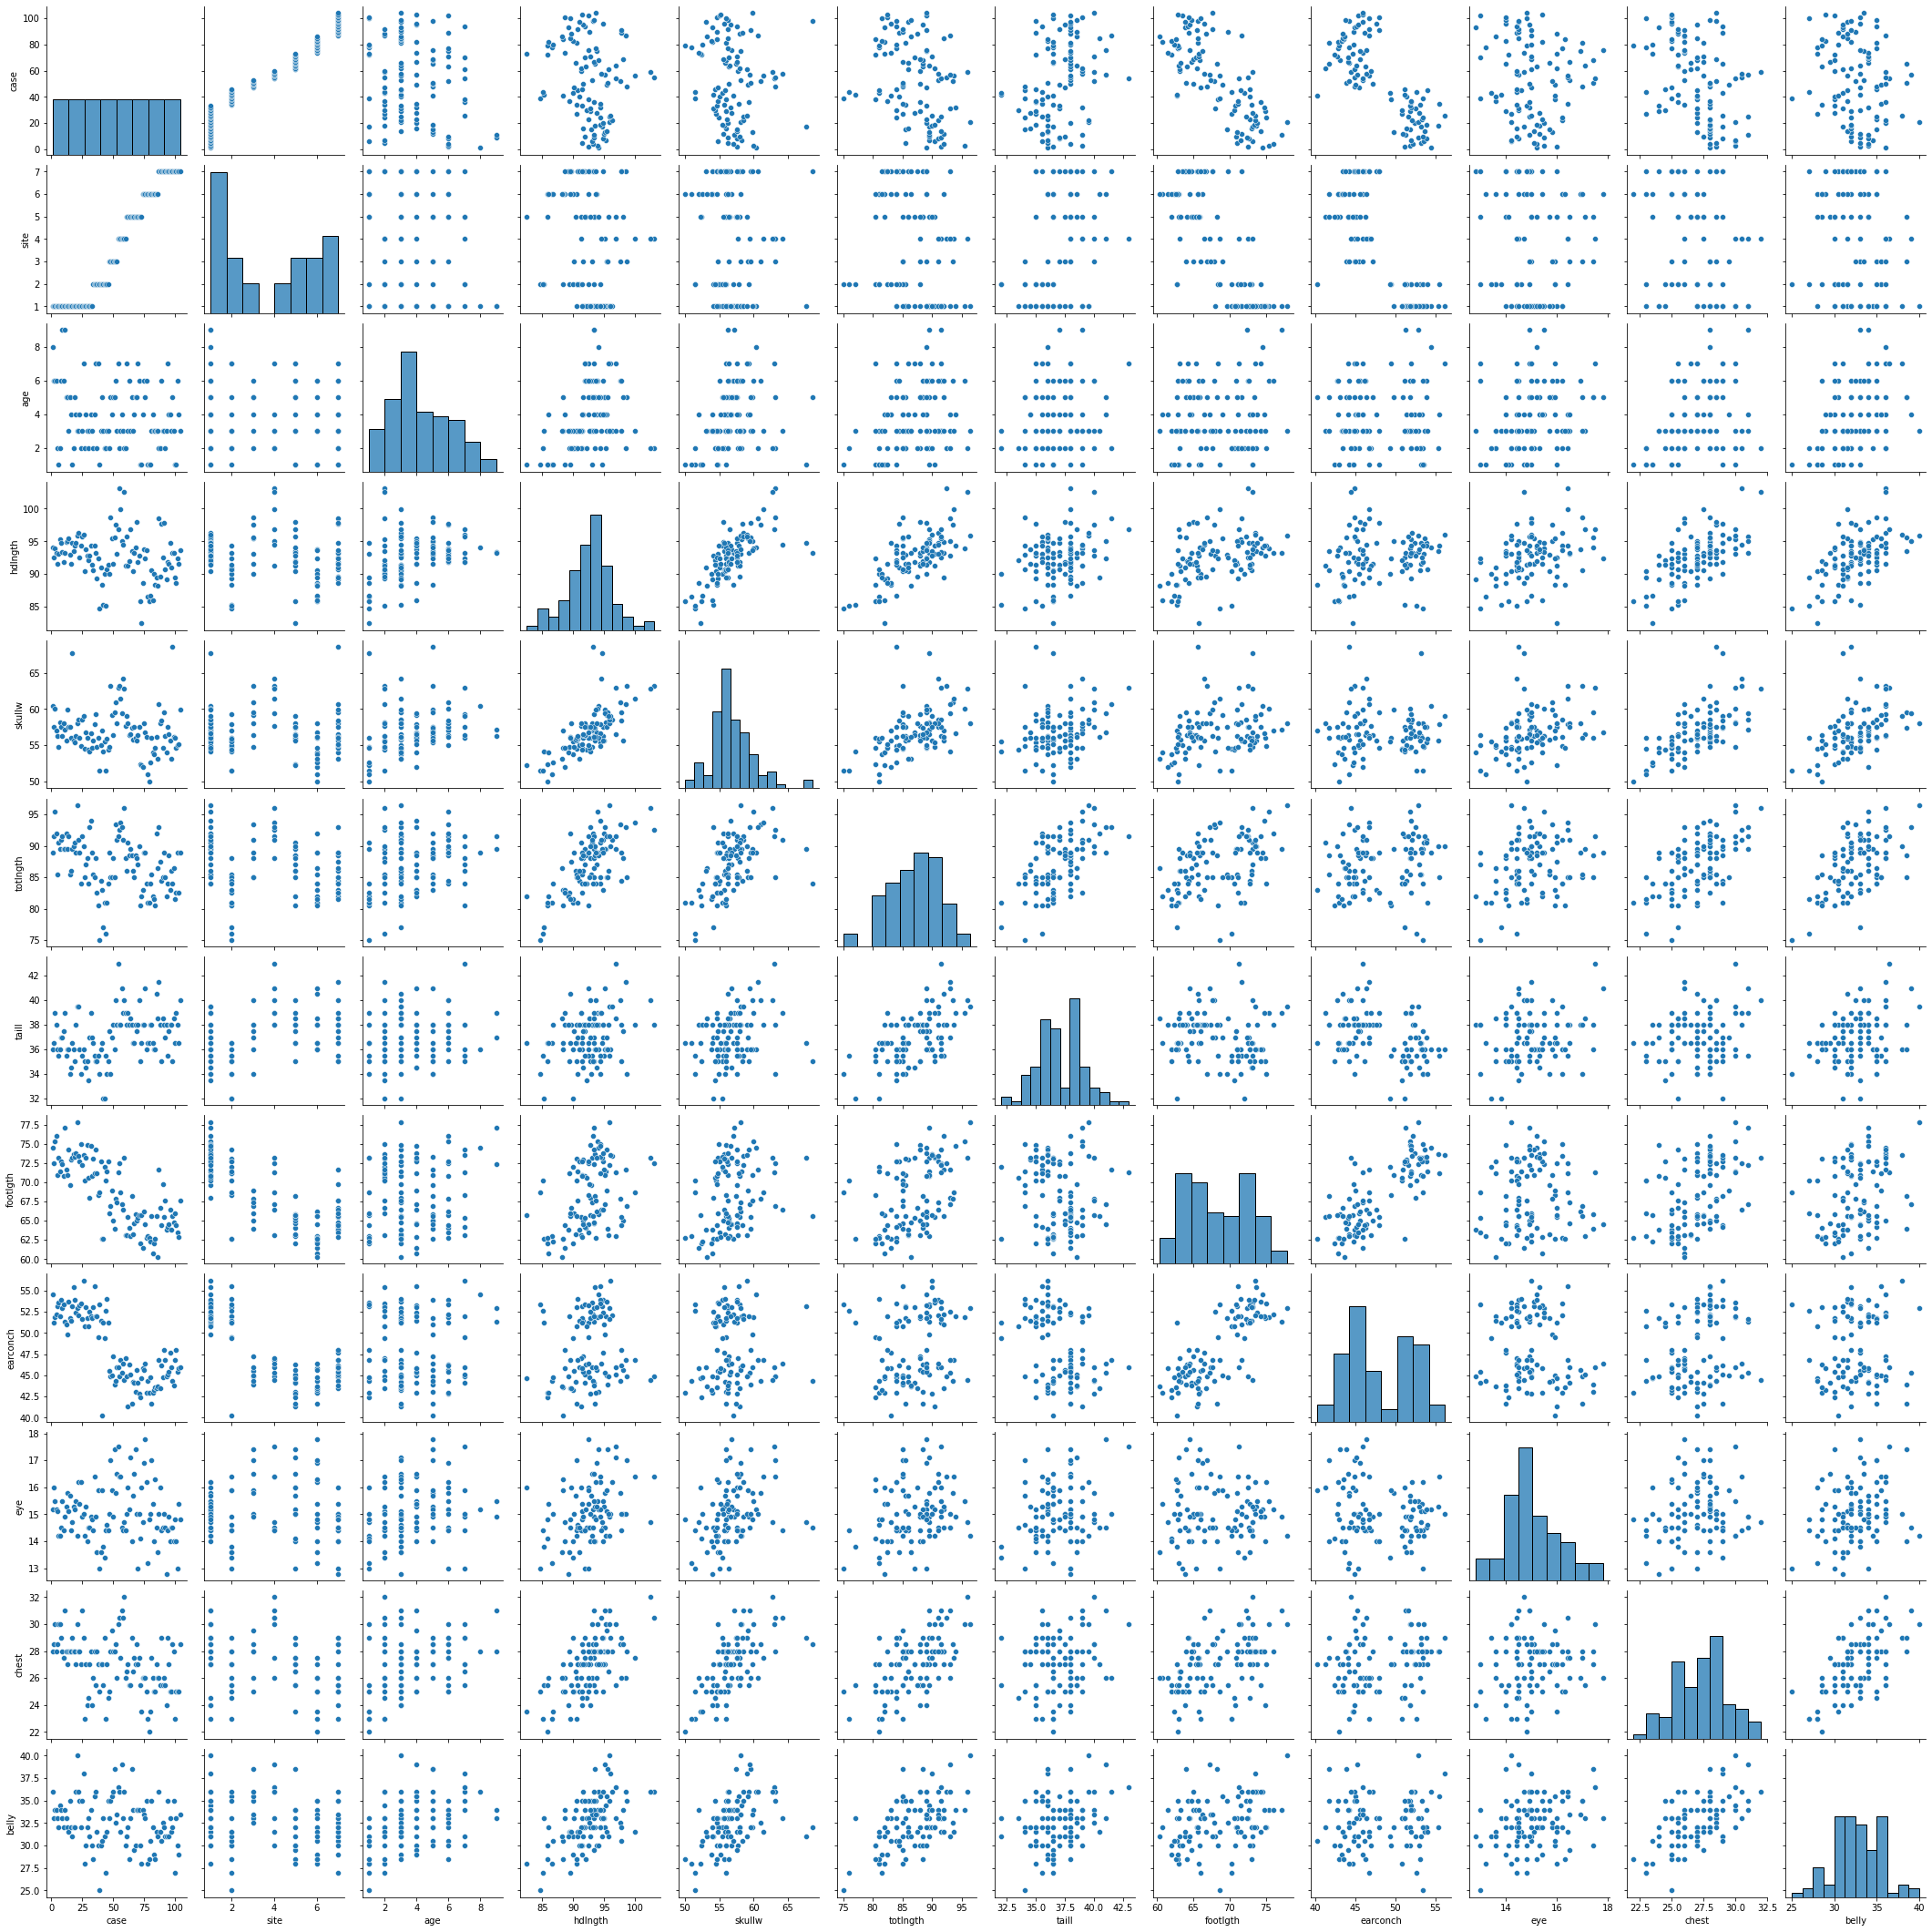

In [307]:
sns.pairplot(pos)

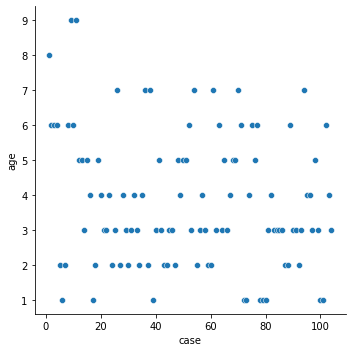

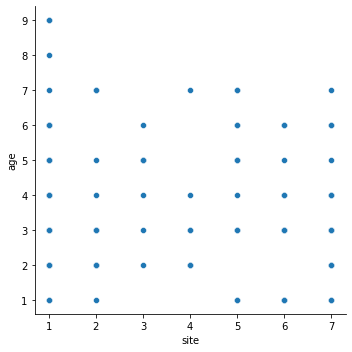

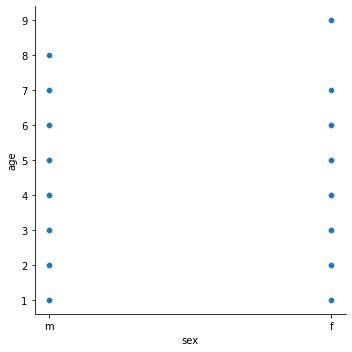

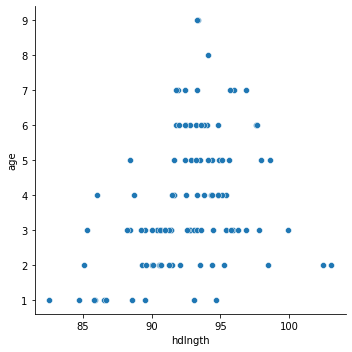

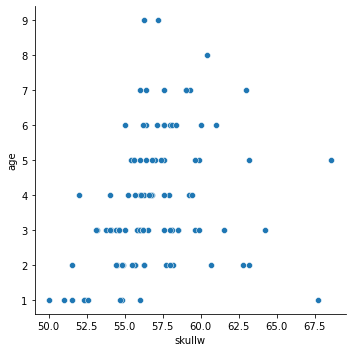

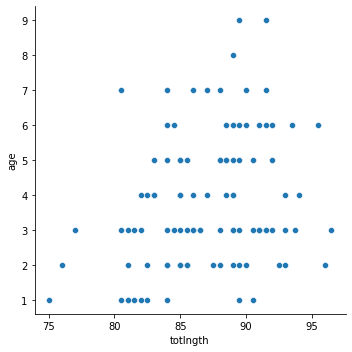

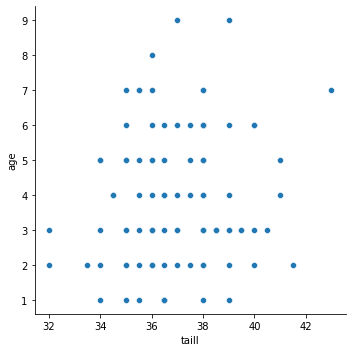

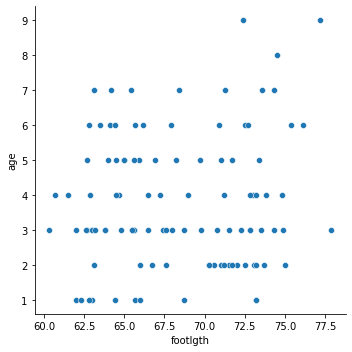

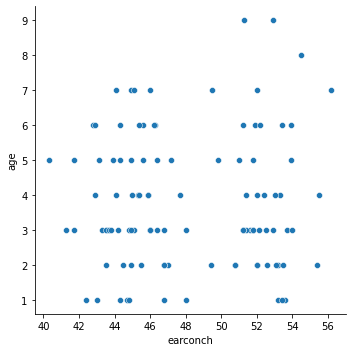

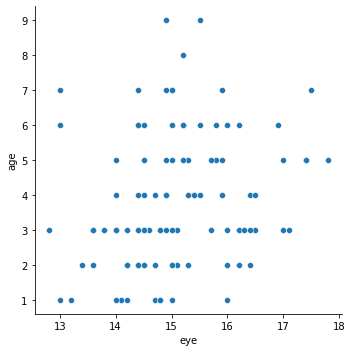

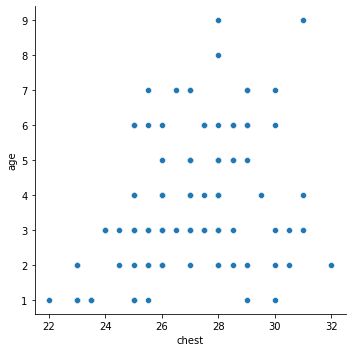

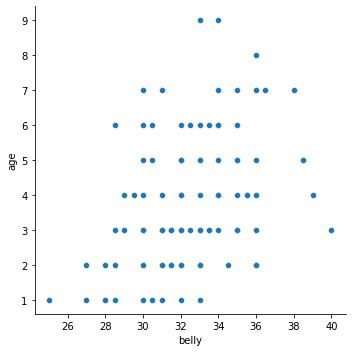

In [308]:
sns.relplot(x = "case", y = "age", data = pos)
sns.relplot(x = "site", y = "age", data = pos)
sns.relplot(x = "sex", y = "age", data = pos)
sns.relplot(x = "hdlngth", y = "age", data = pos)
sns.relplot(x = "skullw", y = "age", data = pos)
sns.relplot(x = "totlngth", y = "age", data = pos)
sns.relplot(x = "taill", y = "age", data = pos)
sns.relplot(x = "footlgth", y = "age", data = pos)
sns.relplot(x = "earconch", y = "age", data = pos)
sns.relplot(x = "eye", y = "age", data = pos)
sns.relplot(x = "chest", y = "age", data = pos)
sns.relplot(x = "belly", y = "age", data = pos)

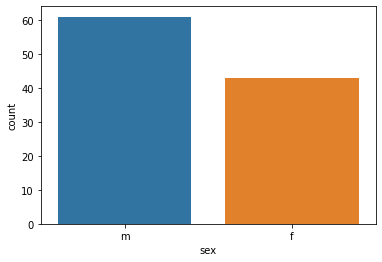

In [309]:
sns.countplot(x = 'sex', data = pos)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


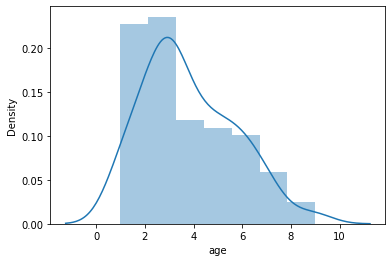

In [310]:
sns.distplot(pos.age)

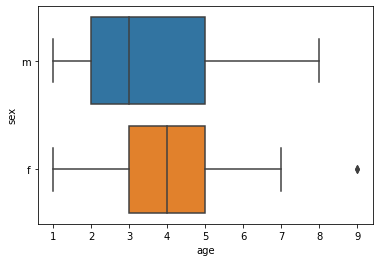

In [311]:
sns.boxplot(x = 'age', y = 'sex', data = pos)

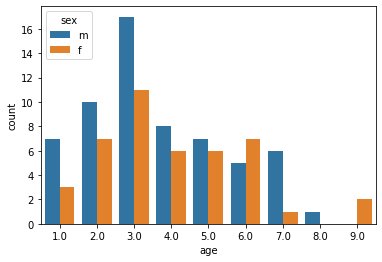

In [312]:
sns.countplot(x = 'age', hue = 'sex', data = pos)

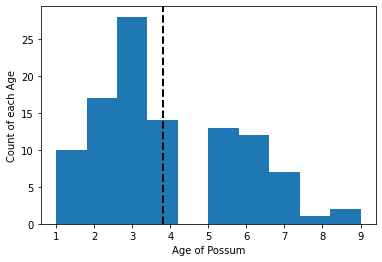

In [313]:
plt.hist(pos['age'])
plt.axvline(pos['age'].mean(), color = 'k', linestyle = 'dashed', linewidth = 2)
plt.xlabel("Age of Possum")
plt.ylabel("Count of each Age")
plt.show()

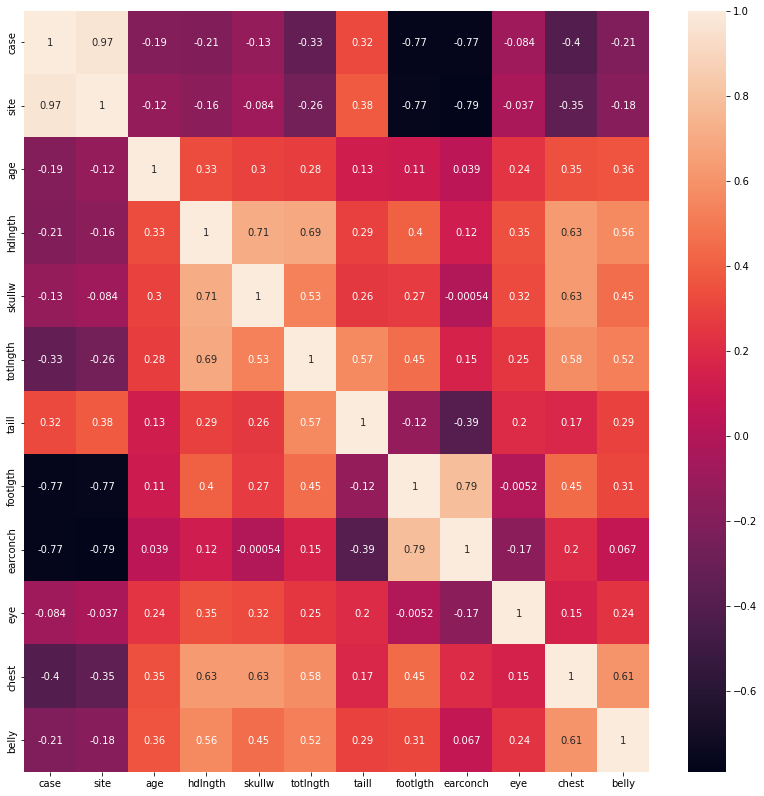

In [314]:
corr = pos.corr()
plt.subplots(figsize=(14,14))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

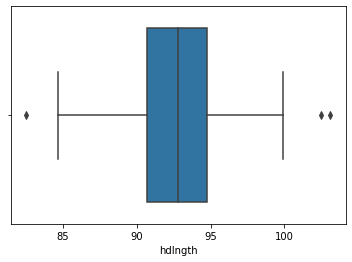

In [315]:
sns.boxplot(data = pos, x = 'hdlngth')

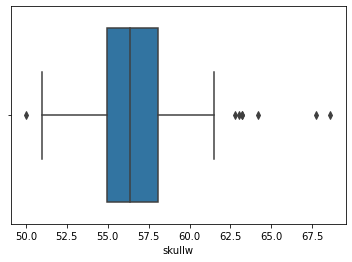

In [316]:
sns.boxplot(data = pos, x = 'skullw')

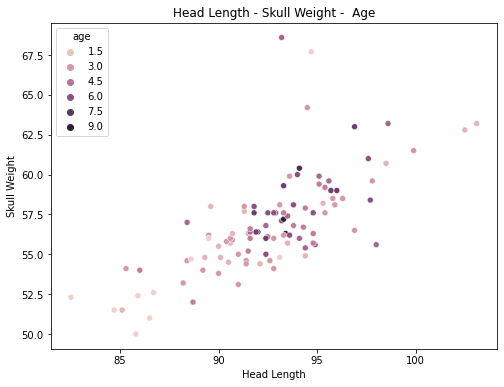

<Figure size 432x288 with 0 Axes>

In [317]:
plt.figure(figsize=(8,6))
plt.title('Head Length - Skull Weight -  Age')
sns.scatterplot(x=pos['hdlngth'], y=pos['skullw'], hue=pos['age'])
plt.xlabel('Head Length')
plt.ylabel('Skull Weight')

plt.show()
plt.tight_layout()

In [318]:
pos.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [319]:
le = LabelEncoder()
pos['sex'] = le.fit_transform(pos['sex'])
pos['Pop'] = le.fit_transform(pos['Pop'])

In [320]:
pos

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,0,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,0,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,0,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,0,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,0,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,1,1,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,1,1,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,1,0,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,1,1,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [321]:
pos.drop(columns = ['case','site','Pop'], inplace = True)

In [393]:
x = pos['skullw'].values
y = pos['hdlngth'].values
print(x)
print(y)

[60.4 57.6 60.  57.1 56.3 54.8 58.2 57.6 56.3 58.  57.2 55.6 59.9 57.6
 57.6 56.  67.7 55.7 55.4 56.3 58.1 58.5 56.1 54.9 58.5 59.  54.5 56.8
 56.  54.4 54.1 56.7 54.6 55.7 57.9 59.3 54.8 56.  51.5 55.  57.  54.1
 55.5 51.5 55.9 54.4 54.8 63.2 59.2 56.4 59.6 61.  58.1 63.  63.2 61.5
 59.4 64.2 62.8 57.7 59.  58.  56.4 56.5 57.4 55.8 57.6 56.  55.6 56.4
 57.6 52.4 52.3 52.  58.1 56.8 56.2 51.  50.  52.6 56.  54.  53.8 54.6
 56.2 53.2 60.7 58.  58.4 54.6 59.6 56.3 54.  57.6 56.6 55.7 53.1 68.6
 56.2 56.  54.7 55.  55.2 59.9]
[ 94.1  92.5  94.   93.2  91.5  93.1  95.3  94.8  93.4  91.8  93.3  94.9
  95.1  95.4  92.9  91.6  94.7  93.5  94.4  94.8  95.9  96.3  92.5  94.4
  95.8  96.   90.5  93.8  92.8  92.1  92.8  94.3  91.4  90.6  94.4  93.3
  89.3  92.4  84.7  91.   88.4  85.3  90.   85.1  90.7  91.4  90.1  98.6
  95.4  91.6  95.6  97.6  93.1  96.9 103.1  99.9  95.1  94.5 102.5  91.3
  95.7  91.3  92.   96.9  93.5  90.4  93.3  94.1  98.   91.9  92.8  85.9
  82.5  88.7  93.8  92.4  93.6  8

In [394]:
x.shape

(104,)

In [395]:
y

array([ 94.1,  92.5,  94. ,  93.2,  91.5,  93.1,  95.3,  94.8,  93.4,
        91.8,  93.3,  94.9,  95.1,  95.4,  92.9,  91.6,  94.7,  93.5,
        94.4,  94.8,  95.9,  96.3,  92.5,  94.4,  95.8,  96. ,  90.5,
        93.8,  92.8,  92.1,  92.8,  94.3,  91.4,  90.6,  94.4,  93.3,
        89.3,  92.4,  84.7,  91. ,  88.4,  85.3,  90. ,  85.1,  90.7,
        91.4,  90.1,  98.6,  95.4,  91.6,  95.6,  97.6,  93.1,  96.9,
       103.1,  99.9,  95.1,  94.5, 102.5,  91.3,  95.7,  91.3,  92. ,
        96.9,  93.5,  90.4,  93.3,  94.1,  98. ,  91.9,  92.8,  85.9,
        82.5,  88.7,  93.8,  92.4,  93.6,  86.5,  85.8,  86.7,  90.6,
        86. ,  90. ,  88.4,  89.5,  88.2,  98.5,  89.6,  97.7,  92.6,
        97.8,  90.7,  89.2,  91.8,  91.6,  94.8,  91. ,  93.2,  93.3,
        89.5,  88.6,  92.4,  91.5,  93.6])

In [396]:
y.shape

(104,)

In [397]:
x = x.reshape(-1,1)

In [398]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [399]:
scalar = StandardScaler()
x_train_scalar = scalar.fit_transform(x_train)
x_test_scalar = scalar.transform(x_test)

In [400]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [401]:
pred = lr.predict(x_test)

In [402]:
print('r2   : ', metrics.r2_score(y_test, pred))
print('MEA  : ', metrics.mean_absolute_error(y_test, pred))
print('MSE  : ', metrics.mean_squared_error(y_test, pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, pred)))

r2   :  0.5631943506298649
MEA  :  2.1979087648374787
MSE  :  8.639441260920785
RMSE :  2.9392926463557156


Text(0, 0.5, 'y_pred')

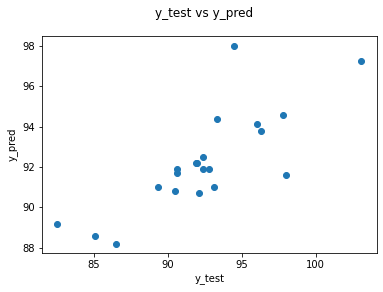

In [403]:
fig = plt.figure()
plt.scatter(y_test, pred)
fig.suptitle('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')